In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

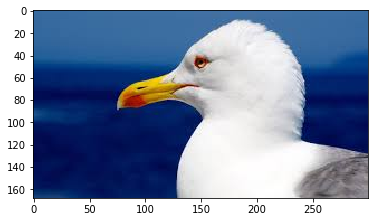

In [2]:
img = cv2.imread('seagull.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
original_img = img
plt.show()

In [3]:
all_pixels=img.reshape(img.shape[0]*img.shape[1],img.shape[2])
print(img.shape)

(168, 300, 3)


In [4]:
dominant_colors = 4
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
centers = km.cluster_centers_
labels=km.labels_

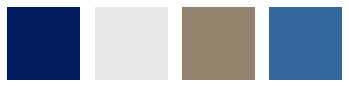

In [6]:
i = 1
colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1    
    colors.append(each_col)    
    # color swatch 
    a = np.zeros((100,100,3), dtype='uint8')
    a[:, :, :] = each_col
    plt.imshow(a)    
plt.show()

In [7]:
new_img = np.zeros((330*500,3), dtype='uint8')
print(new_img.shape)

(165000, 3)


In [8]:
a = km.labels_
print(len(a))
colors

50400


[array([ 2.3846675 , 26.17907025, 94.21367521]),
 array([231.79296121, 231.54839997, 232.58539019]),
 array([146.59794553, 130.16220736, 110.86884854]),
 array([ 53.21892455, 104.4417674 , 157.54089204])]

In [9]:
new_img=np.zeros((img.shape[0]*img.shape[1],img.shape[2]),dtype='uint8')
for i in range(new_img.shape[0]):
    new_img[i]=colors[labels[i]]

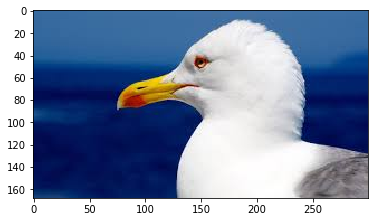

In [10]:
plt.imshow(new_img)
plt.imshow(original_img)
plt.show()

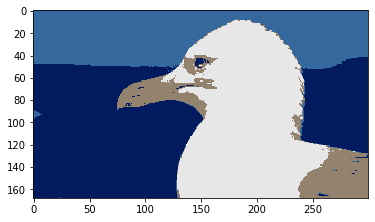

In [11]:
new_img=new_img.reshape(img.shape)
plt.imshow(new_img)
plt.show()